In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
re_base_path = "single_objective/linear_regression/scalar_linear_regression/non_skip_introns"
nsga2_base_path = "multi_objective/linear_regression/scalar_linear_regression/non_skip_introns"

n_seeds = 30

In [21]:
def get_num_func_evals(file_path):
    with open(file_path, "r") as rf:
        line = rf.readline()
        id = line.find("first time feasible solution:")
        num = line[id+30:]
        return int(num)

In [35]:
list_re_vals = []
list_nsga2_mut_vals = []
list_nsga2_cross_mut_vals = []

for seed in range(1, n_seeds+1):
    list_re_vals.append(get_num_func_evals(f"{re_base_path}/seed_{seed}/final_program_descriptions.txt"))
    list_nsga2_mut_vals.append(get_num_func_evals(f"{nsga2_base_path}/seed_{seed}/mut/final_programs_descriptions.txt"))
    list_nsga2_cross_mut_vals.append(get_num_func_evals(f"{nsga2_base_path}/seed_{seed}/cross_mut/final_programs_descriptions.txt"))

In [36]:
df = pd.DataFrame()
df["single_objective_re"] = list_re_vals
df["multi_objective_nsga2_mut"] = list_nsga2_mut_vals
df["multi_objective_nsga2_cross_mut"] = list_nsga2_cross_mut_vals
df.to_csv(f"func_eval_comparisons.csv")

/tmp/ipykernel_681483/1920952613.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


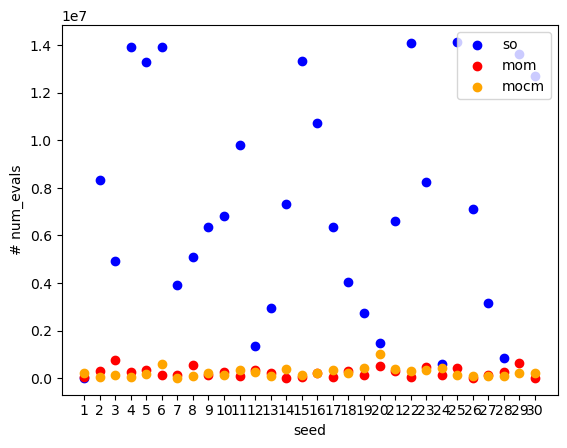

In [37]:
fig, ax = plt.subplots()
# list_re_vals = np.log(np.array(list_re_vals))
# list_nsga2_mut_vals = np.log(np.array(list_nsga2_mut_vals))
# list_nsga2_cross_mut_vals = np.log(np.array(list_nsga2_cross_mut_vals))
ax.scatter(np.arange(1, n_seeds+1), list_re_vals, label="so", color="blue")
ax.scatter(np.arange(1, n_seeds+1), list_nsga2_mut_vals, label="mom", color="red")
ax.scatter(np.arange(1, n_seeds+1), list_nsga2_cross_mut_vals, label="mocm", color="orange")
ax.legend(loc="upper right")
ax.set_xticks(np.arange(1, n_seeds+1), np.arange(1, n_seeds+1))
ax.set_xlabel("seed")
ax.set_ylabel("# num_evals")
fig.show()

/tmp/ipykernel_681483/3818766001.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


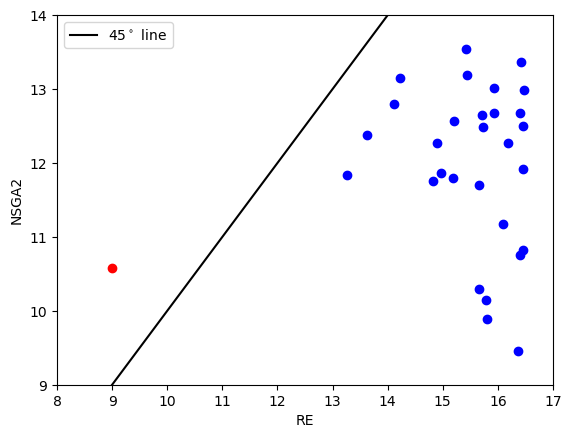

In [53]:
fig, ax = plt.subplots()
list_re_log_vals = np.log(np.array(list_re_vals))
list_nsga2_mut_log_vals = np.log(np.array(list_nsga2_mut_vals))
list_nsga2_cross_mut_log_vals = np.log(np.array(list_nsga2_cross_mut_vals))
for seed in range(1, n_seeds+1):
    if list_re_log_vals[seed-1] < list_nsga2_mut_log_vals[seed-1]:
        color = "red"
    else:
        color = "blue"
    ax.scatter(list_re_log_vals[seed-1], list_nsga2_mut_log_vals[seed-1], color=color)
ax.set_xlim([8, 17])
ax.set_ylim([9, 14])
ax.axline([0, 0], [1, 1], color="black", label=f"45$^\circ$ line")
ax.set_xlabel("RE")
ax.set_ylabel("NSGA2")
ax.legend(loc="upper left")
fig.show()

# Hypervolume calculation

In [54]:
seed = 2
path = f"{nsga2_base_path}/seed_{seed}/cross_mut/hv_exp_cross_mut.txt"
hv_df = pd.read_csv(path, names=["eval", "hv"])
hv_df

,eval,hv
0,18315,16.0882
1,28315,16.0882
2,34983,16.0882
3,41929,16.0882
4,48720,16.0882
...,...,...
38607,199977935,85.0694
38608,199986075,85.0949
38609,199992013,85.0938
38610,199997377,85.0945


NameError: name 'hv_df' is not defined